In [1]:
import numpy as np
np.random.seed(2016)

import os
import glob
import cv2
import math
import pickle
import datetime
import pandas as pd
import time
from shutil import copy2
import warnings
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

warnings.filterwarnings("ignore")  # this is weird

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.metrics import log_loss
from scipy.misc import imread, imresize, imshow

Using TensorFlow backend.


In [2]:
def read_model(arch_path, weights_path):
    model = model_from_json(open(arch_path).read())
    model.load_weights(weights_path)
    return model

In [3]:
def get_im_cv2_mod(path, img_rows, img_cols, color_type=1):
    # Load as grayscale
    if color_type == 1:
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
    resized = cv2.resize(img, (img_cols, img_rows), interpolation = cv2.INTER_LINEAR) 
    return resized

1 files to be predicted
     adidas    jordan  newbalance      nike
0  0.864634  0.036161    0.061093  0.038111


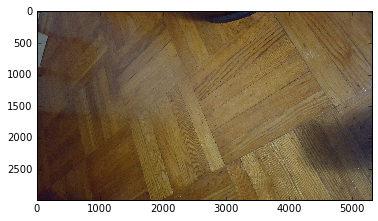

In [8]:
def run_single():
    # input image dimensions
    img_rows, img_cols = 64, 64
    color_type_global = 1
    
    path = os.path.join('.', 'ad_hoc_data', 'preprocessing', '*')
    files = glob.glob(path)
 
    for fl in files:
        flbase = os.path.basename(fl)
        im = Image.open(fl)
        im.save('./ad_hoc_data/' + str(flbase)[:-4]+'.png', "PNG")
        os.rename(fl,'../'+ str(flbase))
    
    
    path = os.path.join('.', 'ad_hoc_data', '*.png')
    files = glob.glob(path)

    to_predict = []
    
    for fl in files:
        flbase = os.path.basename(fl)
        img = get_im_cv2_mod(fl, img_rows, img_cols, color_type_global)
        to_predict.append(img)
        
    
    print str(len(to_predict)) + ' files to be predicted'
    to_predict = np.array(to_predict, dtype=np.uint8)
    
    
    
    arch_path = os.path.join('.', 's_loss_0.531153076115_r_64_c_64_folds_10_ep_50_2016-12-18-18-21_model.json')
    weights_path = os.path.join('.', 'weights_kfold_9.h5')

    model = read_model(arch_path, weights_path)
    
    
    path = fl

    img = Image.open(path)
    plt.imshow(img)
    
    i=0
    
    a = to_predict[i].reshape(1,1,64,64)
    a = a.astype('float32')
    a /= 255
    predictions = model.predict(a)
    df = pd.DataFrame(predictions, columns=['adidas', 'jordan', 'newbalance', 'nike'])
    print df
    os.rename(fl,'./ad_hoc_data/predicted/'+ str(flbase))



if __name__ == '__main__':
     run_single()
